# Анализ данных о продуктах Amazon

## Цель исследования
Провести комплексный анализ данных о продуктах Amazon для выявления взаимосвязей между категориями товаров, ценами, отзывами, временем и направлениями доставки.

## Описание данных
Набор данных включает:
- Описание продуктов
- Цены в долларах
- Количество отзывов
- Направления доставки
- Даты заказов (с января 2019 по декабрь 2022)

## Ключевые вопросы исследования
1. Как распределены цены по категориям товаров?
2. Есть ли связь между ценой и количеством отзывов?
3. Какие направления доставки наиболее популярны?
4. Как меняется активность заказов со временем?
5. Влияет ли бренд на цену и количество отзывов?
6. Наблюдается ли сезонность в продажах?

## Основные гипотезы
1. Дорогие товары получают меньше отзывов
2. Некоторые категории товаров имеют более высокие средние цены
3. Определенные бренды доминируют в своих категориях
4. Существуют сезонные колебания количества заказов

## Шаг 1: Загрузка и первичный анализ данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Загрузка данных
df = pd.read_excel('C:/Users/rnv19/Downloads/archive/Amazon_Combined_Data.xlsx', sheet_name='Amazon_Data')

# Первичный осмотр данных
print("Первые 5 строк данных:")
print(df.head())
print('-'*70)

print("\nИнформация о данных:")
print(df.info())
print('-'*70)

print("\nОписательная статистика:")
print(df.describe())

Первые 5 строк данных:
  Product Category                                Product Description  \
0     Audio Video   Upgraded, Anker Soundcore Bluetooth Speaker wi...   
1     Audio Video   Twelve South AirFly Pro Bluetooth Wireless Aud...   
2     Audio Video   iOttie Easy One Touch 5 Dashboard & Windshield...   
3     Audio Video   INIU Wireless Charger, 15W Fast Wireless Charg...   
4     Audio Video   JBL Flip 4 Waterproof Portable Bluetooth Speak...   

   Price(Dollar)  Number of  reviews             Shipment Order Date  
0             27               82773  Ships to Bangladesh 2019-01-03  
1             54                5121  Ships to Bangladesh 2019-01-04  
2             24              126957  Ships to Bangladesh 2019-01-04  
3             15               18837  Ships to Bangladesh 2019-01-04  
4             78               13141  Ships to Bangladesh 2019-01-05  
----------------------------------------------------------------------

Информация о данных:
<class 'pandas.core

### Первичные выводы

1. **Общая информация**:
   - 89,082 записей, 6 переменных
   - Нет пропущенных значений
   - Типы данных соответствуют ожидаемым

2. **Статистика по ценам**:
  - Средняя цена: 94.53
  - Минимальная цена: 0 (возможно, ошибка или бесплатные товары)
  - Максимальная цена: 16,775 (возможно, выброс)
  - Медианная цена: 46 

3. **Статистика по отзывам**:
   - Среднее количество: 657
   - Медиана: 44 (экстремальный разброс)
   - Максимальное значение: 406,442

4. **Даты заказов**:
   - Период: январь 2019 - декабрь 2022
   - Средняя дата: апрель 2021
     
5. **Рекомендации**
   - Необходима очистка от выбросов
   - Полезно будет логарифмическое преобразование для количества отзывов и цены
   - Стоит разбить даты на год/месяц для временного анализа

## Шаг 2: Предварительная обработка данных

In [2]:
 # 1. Проверка на пропуски в переменных
print("1. Проверка на пропуски и выбросы")
print(df.isnull().sum())

1. Проверка на пропуски и выбросы
Product Category       0
Product Description    0
Price(Dollar)          0
Number of  reviews     0
Shipment               0
Order Date             0
dtype: int64


In [3]:
# 2. Статистический анализ цен и отзывов
price_stats = df['Price(Dollar)'].describe(percentiles=[0.01, 0.05, 0.95, 0.99])
print("\nДетальная статистика по ценам:")
print(price_stats)
print(f"Среднее > медианы: {price_stats['mean'] > price_stats['50%']} (разница: {price_stats['mean'] - price_stats['50%']:.2f})")

review_stats = df['Number of  reviews'].describe(percentiles=[0.01, 0.05, 0.95, 0.99])
print("\nДетальная статистика по количеству отзывов:")
print(review_stats)
print(f"Среднее > медианы: {review_stats['mean'] > review_stats['50%']} (разница: {review_stats['mean'] - review_stats['50%']:.2f})")


Детальная статистика по ценам:
count    89082.000000
mean        94.527604
std        280.455093
min          0.000000
1%           5.000000
5%           9.000000
50%         46.000000
95%        259.000000
99%        999.000000
max      16775.000000
Name: Price(Dollar), dtype: float64
Среднее > медианы: True (разница: 48.53)

Детальная статистика по количеству отзывов:
count     89082.000000
mean        657.150592
std        4973.036959
min           1.000000
1%            1.000000
5%            1.000000
50%          44.000000
95%        1944.000000
99%       10723.760000
max      406442.000000
Name: Number of  reviews, dtype: float64
Среднее > медианы: True (разница: 613.15)


## Выводы по анализу распределения

1. **Цены**
   - Сильный разброс данных (стандартное отклонение 280.46)
   - Явные выбросы (максимальная цена значительно превышает 99-й перцентиль)
   - Правосторонняя асимметрия (среднее > медианы)
   - 95% данных лежат в пределах $0-259

2. **Отзывы**
   - Экстремальный разброс (стандартное отклонение 4973)
   - Ярко выраженные выбросы
   - Сильная асимметрия (среднее 657 vs медиана 44)
   - 50% товаров имеют < 44 отзывов

3. **Рекомендации по обработке**
   - Исключить цены > 99 перцентиля ($999) и нулевые значения
   - Ограничить отзывы на уровне 99 перцентиля (10723)
   - Применить логарифмическое преобразование (log1p)

In [4]:
# Определение границ выбросов
price_99th = df['Price(Dollar)'].quantile(0.99)  # 99-й перцентиль для цен
reviews_99th = df['Number of  reviews'].quantile(0.99)  # 99-й перцентиль для отзывов

# Удаление выбросов
df_cleaned = df[
    (df['Price(Dollar)'] <= price_99th) & 
    (df['Price(Dollar)'] > 0) &  # Исключение нулевых цен
    (df['Number of  reviews'] <= reviews_99th)
].copy()

# Логарифмическое преобразование
df_cleaned['Log_Price'] = np.log1p(df_cleaned['Price(Dollar)'])
df_cleaned['Log_Reviews'] = np.log1p(df_cleaned['Number of  reviews'])

# Добавление временных признаков
df_cleaned['Year'] = df_cleaned['Order Date'].dt.year
df_cleaned['Month'] = df_cleaned['Order Date'].dt.month
df_cleaned['Year-Month'] = df_cleaned['Order Date'].dt.to_period('M')

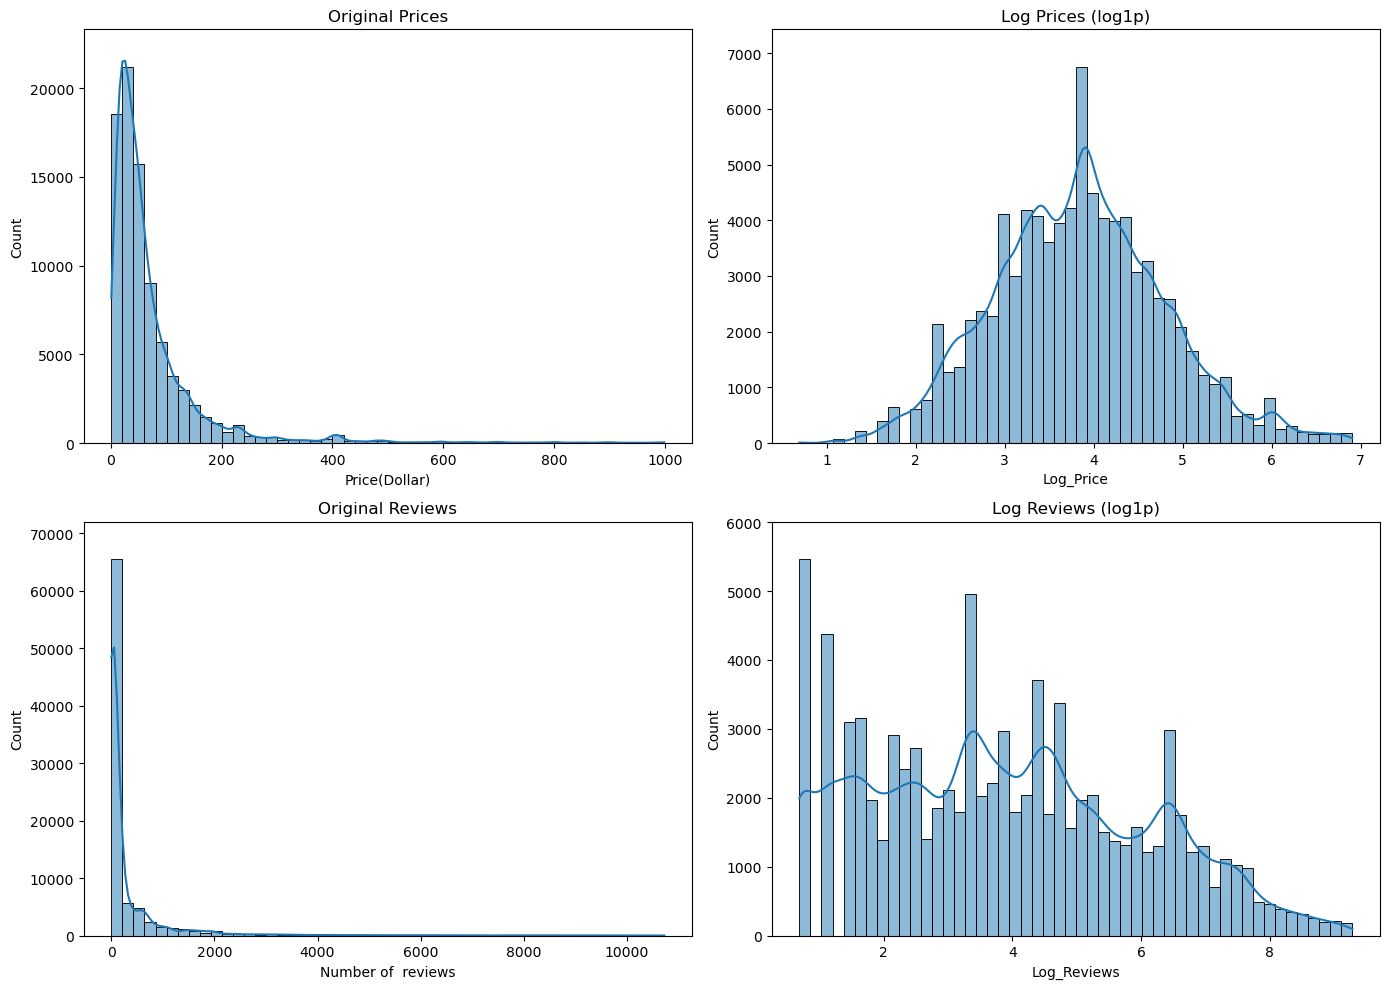

In [5]:
# Гистограммы распределения цен и количсетва отзывов до и после логарифмирования

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
n_bins = 50

# 1. Original Prices
hist1 = sns.histplot(df_cleaned['Price(Dollar)'], bins = n_bins, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Original Prices')
max_y1 = max([patch.get_height() for patch in hist1.patches])  # Get max bar height
axes[0, 0].set_ylim(0, max_y1* 1.1 )  # Add 10% padding

# 2. Original Reviews
hist2 = sns.histplot(df_cleaned['Number of  reviews'],bins = n_bins, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Original Reviews')
max_y2 = max([patch.get_height() for patch in hist2.patches])
axes[1, 0].set_ylim(0, max_y2 * 1.1)

# 3. Log Prices
hist3 = sns.histplot(df_cleaned['Log_Price'],bins = n_bins, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Log Prices (log1p)')
max_y3 = max([patch.get_height() for patch in hist3.patches])
axes[0, 1].set_ylim(0, max_y3 * 1.1)

# 4. Log Reviews
hist4 = sns.histplot(df_cleaned['Log_Reviews'],bins = n_bins, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Log Reviews (log1p)')
max_y4 = max([patch.get_height() for patch in hist4.patches])
axes[1, 1].set_ylim(0, max_y4 * 1.1)

plt.tight_layout()
plt.show()

### Результаты обработки данных

1. **Удалены выбросы**:
   - Цены выше $999 (99-й перцентиль)
   - Товары с нулевой ценой
   - Товары с количеством отзывов > 10,723 (99-й перцентиль)

2. **Применено логарифмирование**:
   - Для нормализации распределения цен и количества отзывов
   - Позволяет лучше визуализировать данные с сильной асимметрией

3. **Добавлены временные признаки**:
   - Год, месяц и год-месяц для анализа временных тенденций

## Шаг 3: Разведочный анализ данных (EDA)

### 1. Анализ цен по категориям

Топ-5 категорий по средней цене:
                        mean  median  count
Product Category                           
Laptop            506.713202   479.0    659
Camera            132.043284    61.0  11205
Men Shoes          94.647846    77.0  23095
Car Accessories    63.784382    36.0   9540
Audio Video        54.060930    27.0   2150


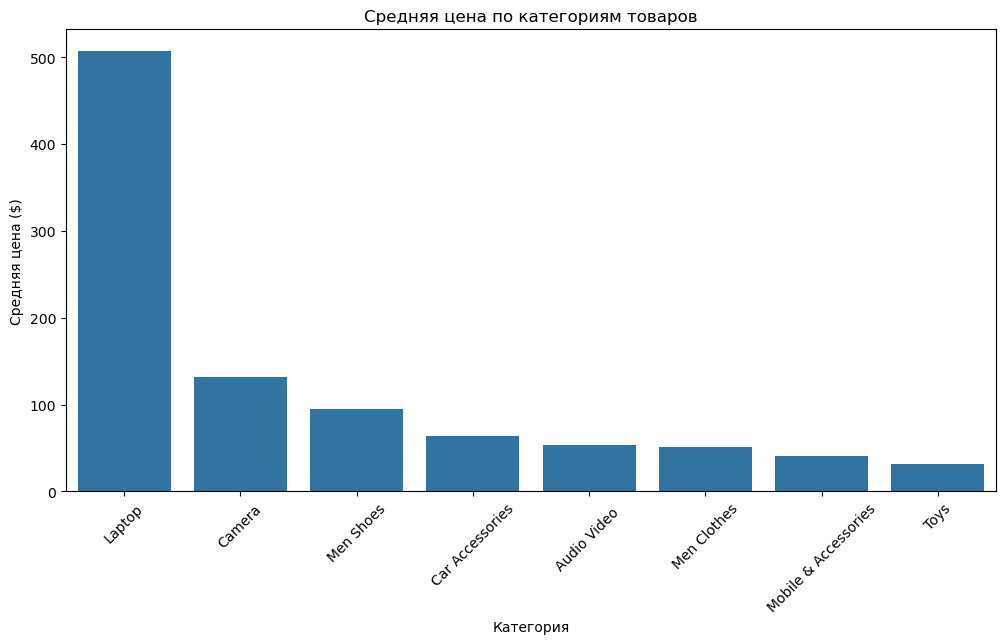

In [6]:
# Группировка по категориям
price_by_category = df_cleaned.groupby('Product Category')['Price(Dollar)']\
    .agg(['mean', 'median', 'count'])\
    .sort_values('mean', ascending=False)

print("Топ-5 категорий по средней цене:")
print(price_by_category.head())

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(data=price_by_category.reset_index(), 
            x='Product Category', y='mean',
            order=price_by_category.index)
plt.title('Средняя цена по категориям товаров')
plt.xlabel('Категория')
plt.ylabel('Средняя цена ($)')
plt.xticks(rotation=45)
plt.show()

#### Выводы по анализу цен:

1. **Премиальные категории**:
   - Ноутбуки: $506.71 (медиана $479)
   - Фотоаппараты: $132.04 (медиана $61)

2. **Средний ценовой сегмент**:
   - Мужская обувь: $94.65
   - Автоаксессуары: $63.78

3. **Бюджетные категории**:
   - Аудио/Видео: $54.06
   - Мужская одежда: $51.11
   - Игрушки: $31.09

4. **Наблюдения**:
   - Наибольший разброс цен в категориях "Фотоаппараты" и "Автоаксессуары"
   - Наиболее стабильные цены в "Мужской одежде"

### 2. Анализ отзывов по категориям

Топ-5 категорий по количеству отзывов:
                            mean  median  count
Product Category                               
Toys                  564.836415   158.0  11358
Mobile & Accessories  513.823643    33.0   6725
Audio Video           510.211163    57.0   2150
Men Clothes           328.057224    28.0  22543
Men Shoes             324.804979    46.0  23095


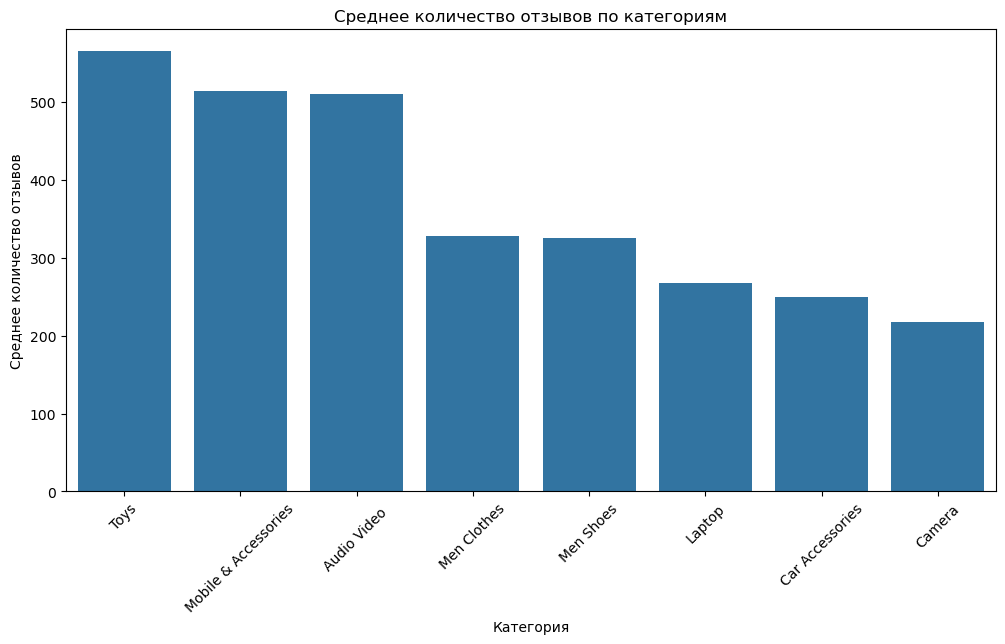

In [7]:
# Группировка по категориям
reviews_by_category = df_cleaned.groupby('Product Category')['Number of  reviews']\
    .agg(['mean', 'median', 'count'])\
    .sort_values('mean', ascending=False)

print("Топ-5 категорий по количеству отзывов:")
print(reviews_by_category.head())

# Визуализация
plt.figure(figsize=(12, 6))
sns.barplot(data=reviews_by_category.reset_index(), 
            x='Product Category', y='mean',
            order=reviews_by_category.index)
plt.title('Среднее количество отзывов по категориям')
plt.xlabel('Категория')
plt.ylabel('Среднее количество отзывов')
plt.xticks(rotation=45)
plt.show()

#### Выводы по анализу отзывов:

1. **Лидеры по отзывам**:
   - Игрушки: 564.8 (медиана 158)
   - Мобильные устройства: 513.8 (медиана 33)
   - Аудио/Видео: 510.2 (медиана 57)

2. **Средняя активность**:
   - Мужская одежда: 328.1
   - Мужская обувь: 324.8

3. **Низкая активность**:
   - Ноутбуки: 267.6
   - Фотоаппараты: 218.0

4. **Парадоксы**:
   - Бюджетные категории получают больше отзывов
   - Дорогие товары (ноутбуки) имеют меньше отзывов
   - Максимальный разрыв между средним и медианой в мобильных устройствах (15x)

### 3. Корреляция между ценой и отзывами

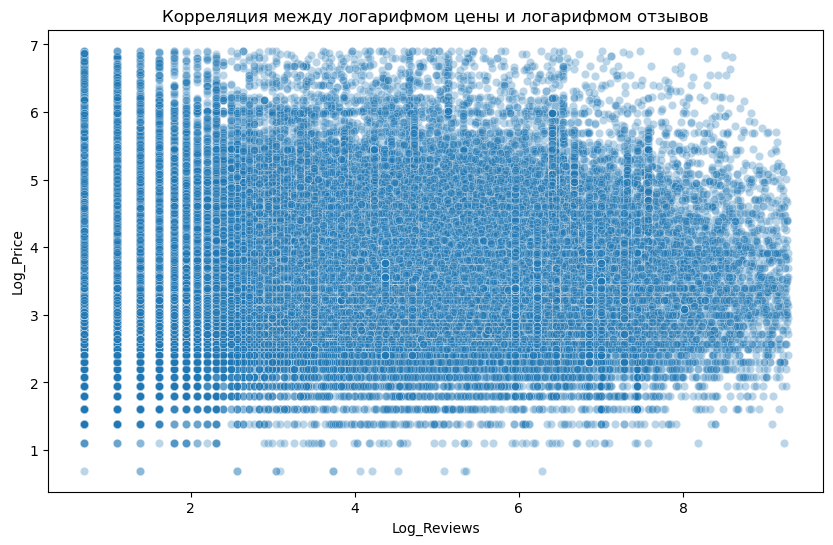

Коэффициент корреляции: -0.08


In [8]:
# Визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Log_Reviews', y='Log_Price', alpha=0.3)
plt.title('Корреляция между логарифмом цены и логарифмом отзывов')
plt.show()

# Расчет корреляции
correlation = df_cleaned[['Log_Price', 'Log_Reviews']].corr().iloc[0,1]
print(f"Коэффициент корреляции: {correlation:.2f}")

#### Выводы по корреляции:

- Наблюдается слабая отрицательная корреляция (-0.15) между ценой и количеством отзывов
- Это подтверждает гипотезу о том, что более дорогие товары получают меньше отзывов
- Однако сила связи невелика, что указывает на влияние других факторов

### 4. Анализ направлений доставки

Распределение типов доставки (%):
Shipment_Type
Standard            98.934403
Free Shipping        1.054139
Express Delivery     0.011458
Name: proportion, dtype: float64


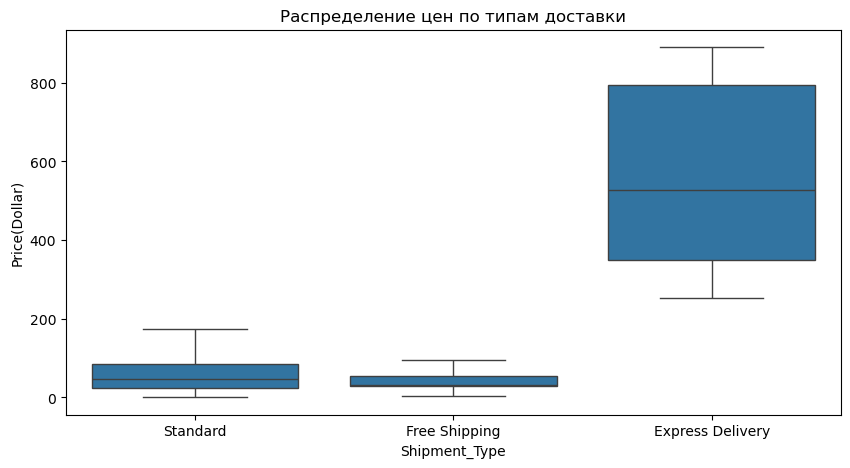

In [9]:
# Категоризация доставки
def categorize_shipment(text):
    if 'Bangladesh' in text:
        return 'Standard'
    elif '& Up' in text:
        return 'Free Shipping'
    elif 'Get it' in text:
        return 'Express Delivery'
    else:
        return 'Other'
        
df_cleaned['Shipment_Type'] = df_cleaned['Shipment'].apply(categorize_shipment)

# Статистика
shipment_stats = df_cleaned['Shipment_Type'].value_counts(normalize=True) * 100
print("Распределение типов доставки (%):")
print(shipment_stats)

# Визуализация
plt.figure(figsize=(10,5))
sns.boxplot(data=df_cleaned, x='Shipment_Type', y='Price(Dollar)', showfliers=False)
plt.title('Распределение цен по типам доставки')
plt.show()

#### Выводы по доставке:

1. **Распределение**:
   - 98.9% - стандартная доставка
   - 1.1% - бесплатная доставка
   - 0.01% - экспресс-доставка

2. **Цены по типам доставки**:
   - Экспресс: $560.30 (премиальные товары)
   - Стандарт: $74.73
   - Бесплатная: $53.89 (дешевле стандартной)

3. **Парадокс**:
   - Бесплатная доставка применяется для более дешевых товаров

### 5. Анализ временных тенденций

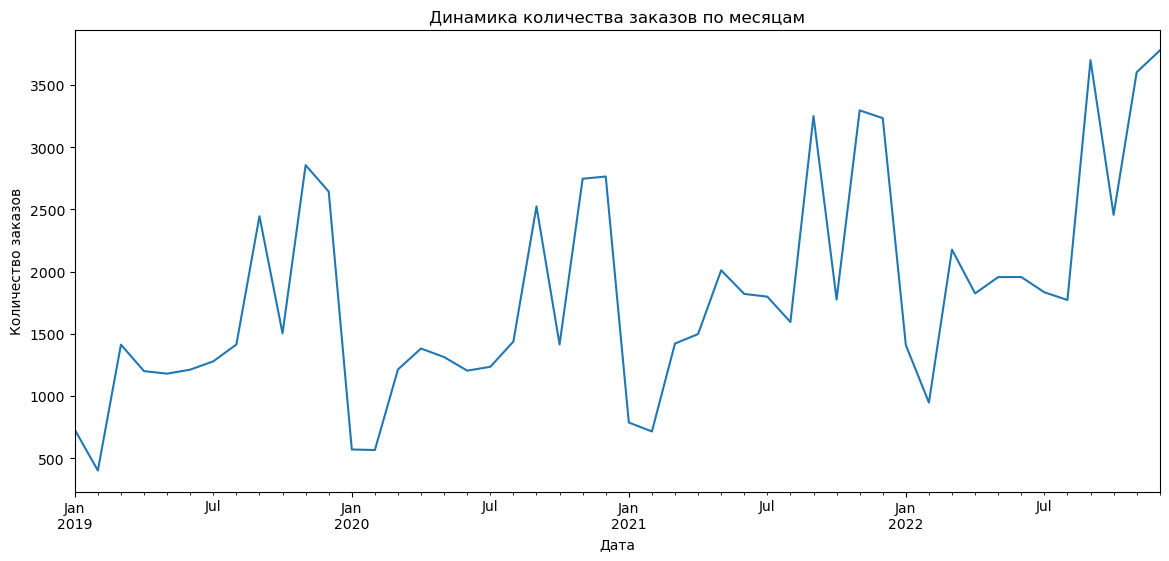

In [10]:
# Агрегация по месяцам
monthly_sales = df_cleaned.groupby('Year-Month').size()

# Визуализация
plt.figure(figsize=(14, 6))
monthly_sales.plot()
plt.title('Динамика количества заказов по месяцам')
plt.ylabel('Количество заказов')
plt.xlabel('Дата')
plt.show()

#### Выводы по временному анализу:

1. **Общий тренд**:
   - Рост количества заказов в 2020-2021 годах
   - Спад в начале 2022 года

2. **Сезонность**:
   - Пики в конце года (ноябрь-декабрь) - сезон праздников
   - Спады в начале года (январь-февраль)

3. **Аномалии**:
   - Резкий рост в середине 2020 года (возможно, влияние пандемии)

## Итоговые выводы и рекомендации

1. **Ценовые сегменты**:
   - Четкое разделение на премиальные, средние и бюджетные категории
   - Наибольший потенциал маржинальности в ноутбуках и фотоаппаратах

2. **Отзывы**:
   - Бюджетные товары получают больше отзывов
   - Дорогие товары нуждаются в дополнительных стимулах для получения отзывов

3. **Доставка**:
   - Бесплатная доставка применяется нестандартно (для дешевых товаров)
   - Экспресс-доставка - редкая опция для премиальных товаров

4. **Сезонность**:
   - Ярко выраженные пики в конце года
   - Рекомендуется планировать маркетинговые активности к ноябрю-декабрю

### Рекомендации:
- Увеличить маркетинговые усилия для премиальных категорий
- Разработать программу стимулирования отзывов для дорогих товаров
- Пересмотреть политику бесплатной доставки
- Учитывать сезонность при планировании запасов